In [1]:
!git clone https://github.com/radhikasethi2011/SilencerEnhancerPredict

Cloning into 'SilencerEnhancerPredict'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 344 (delta 30), reused 88 (delta 27), pack-reused 251
Receiving objects: 100% (344/344), 170.33 MiB | 28.97 MiB/s, done.
Resolving deltas: 100% (164/164), done.
Checking out files: 100% (59/59), done.


In [2]:
cd /content/SilencerEnhancerPredict/examples/

/content/SilencerEnhancerPredict/examples


In [3]:
from tensorflow.keras.optimizers import Adadelta
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adadelta
from sklearn import metrics
import h5py
import os

In [4]:
INPUT_LENGTH = 200
EPOCH = 200
BATCH_SIZE = 64
WORK_DIR = "./"

In [5]:
weights_file = os.path.join('./examples', "model_weights.hdf5")
model_file = os.path.join('./examples', "single_model.hdf5")
#model.save(model_file)

In [6]:
opt = Adadelta()

CODE BASED ON PAPER:

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import BatchNormalization
from keras.layers import InputLayer, LeakyReLU
from keras.layers import LSTM

model1 = Sequential(InputLayer(batch_input_shape= (None, 200, 4),
    dtype= 'float32',
    ragged= False,
    sparse= False))

model1.add(Conv1D(32, (3), activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D((2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='softmax'))

model1.add(Dense(2,activation='softmax',activity_regularizer= None,bias_constraint= None,
                 kernel_constraint= {'class_name': 'MaxNorm',
     'config': {'axis': 0, 'max_value': 1}},
    kernel_initializer= {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    kernel_regularizer= {'class_name': 'L1L2',
     'config': {'l1': 9.99999993922529e-09, 'l2': 4.999999987376214e-07}}
     ))

model1.build()

In [8]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [9]:
model1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 200, 4),
    'dtype': 'float32',
    'name': 'input_1',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv1D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1,),
    'dtype': 'float32',
    'filters': 32,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'HeUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3,),
    'name': 'conv1d',
    'padding': 'valid',
    'strides': (1,),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'BatchNormalization',
   'config': {'axis': ListWrapper([2]),
    'beta_constraint': None,
    'beta_initializer': {'class_name': 'Zeros', 'config': {}},
    'beta_regula

In [10]:
model1.summary(expand_nested=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 32)           416       
                                                                 
 batch_normalization (BatchN  (None, 198, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3168)              0         
                                                                 
 dense (Dense)               (None, 100)               316900    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              4

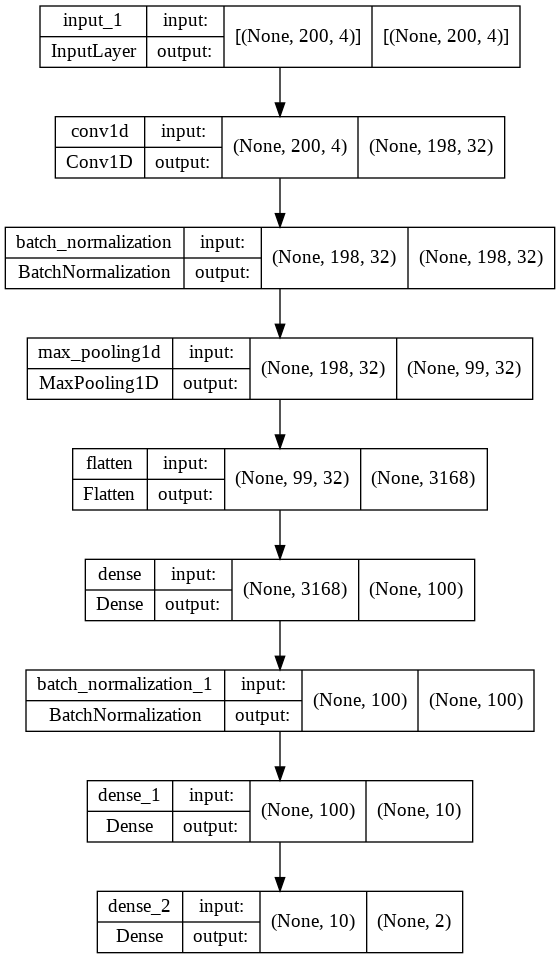

In [51]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
def load_dataset(Dfile):

    print("reading enhancers...")
    data = {}
    with h5py.File(Dfile, "r") as inf:
        for _key in inf:
            data[_key] = inf[_key][()]
    return data

In [12]:
!gzip -d /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5.gz

In [13]:
data = load_dataset('/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5')

reading enhancers...


In [14]:
X_train = data["train_data"]
Y_train = data["train_labels"]
X_validation = data["val_data"]
Y_validation = data["val_labels"]
X_test = data["test_data"]
Y_test = data["test_labels"]

In [15]:
parallel_model = model1

In [16]:
from keras.utils.np_utils import to_categorical
'''
Y_train = to_categorical(Y_train, num_classes=None)
Y_test = to_categorical(Y_test, num_classes=None)
Y_validation = to_categorical(Y_validation, num_classes=None)
'''


_callbacks = []
checkpointer = ModelCheckpoint(filepath=weights_file, verbose=1, save_best_only=True)
_callbacks.append(checkpointer)
earlystopper = EarlyStopping(monitor="val_loss", patience=10, verbose=1)
_callbacks.append(earlystopper)

OUR MODEL

In [17]:
parallel_model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE * 1,
                    epochs=EPOCH,
                    validation_data=(X_validation, Y_validation),
                    shuffle=True,
                    callbacks=_callbacks, verbose=1)

Y_pred = parallel_model.predict(X_test)

Epoch 1/200
78/78 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5444
Epoch 1: val_loss improved from inf to 0.68745, saving model to ./examples/model_weights.hdf5
78/78 [==============================] - 15s 15ms/step - loss: 0.6854 - accuracy: 0.5444 - val_loss: 0.6875 - val_accuracy: 0.5446
Epoch 2/200
76/78 [============================>.] - ETA: 0s - loss: 0.6228 - accuracy: 0.7214
Epoch 2: val_loss did not improve from 0.68745
78/78 [==============================] - 1s 10ms/step - loss: 0.6225 - accuracy: 0.7221 - val_loss: 0.6898 - val_accuracy: 0.5555
Epoch 3/200
77/78 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.8196
Epoch 3: val_loss did not improve from 0.68745
78/78 [==============================] - 1s 9ms/step - loss: 0.5627 - accuracy: 0.8197 - val_loss: 0.6941 - val_accuracy: 0.5252
Epoch 4/200
72/78 [==========================>...] - ETA: 0s - loss: 0.5005 - accuracy: 0.9043
Epoch 4: val_loss did not improve from 0.6

In [18]:
model1.save('/content/SilencerEnhancerPredict/examples/model.hdf5')

In [19]:
#! gunzip /content/SilencerEnhancerPredict/examples/model.hdf5.gz

In [20]:
'''
history = model1.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)
          '''

'\nhistory = model1.fit(input_train, target_train,\n          batch_size=batch_size,\n          epochs=no_epochs,\n          verbose=verbosity,\n          validation_split=validation_split)\n          '

In [21]:
from keras import backend as K
# To get learning rate
print(K.get_value(model1.optimizer.lr))

0.001


In [22]:
! gunzip /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5

gzip: /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5: unknown suffix -- ignored


In [23]:
%pip install Bio
%pip install pybedtools

     |████████████████████████████████| 269 kB 5.4 MB/s 
     |████████████████████████████████| 2.3 MB 42.0 MB/s 
     |████████████████████████████████| 12.5 MB 5.3 MB/s 
     |████████████████████████████████| 15.0 MB 19.9 MB/s 
  Created wheel for pybedtools: filename=pybedtools-0.9.0-cp37-cp37m-linux_x86_64.whl size=13616781 sha256=2d73d53c41293772285b76b869dcd0fb0ce9cfffc631980f68797a4a9c03285a
  Stored in directory: /root/.cache/pip/wheels/7a/44/0d/3a7449885adaf8ebb157da8c3c834a712f48b3b3b84ba51dda
Successfully built pybedtools


In [24]:
!python /content/SilencerEnhancerPredict/train.py /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5 /content/SilencerEnhancerPredict/examples/


2022-04-26 09:16:13.880167: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
reading enhancers...
Epoch 1/200
78/78 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.9863
Epoch 1: val_loss improved from inf to 0.72072, saving model to /content/SilencerEnhancerPredict/examples/model_weights.hdf5
78/78 [==============================] - 6s 27ms/step - loss: 0.3660 - accuracy: 0.9863 - val_loss: 0.7207 - val_accuracy: 0.5518
Epoch 2/200
78/78 [==============================] - ETA: 0s - loss: 0.3664 - accuracy: 0.9830
Epoch 2: val_loss did not improve from 0.72072
78/78 [==============================] - 1s 15ms/step - loss: 0.3664 - accuracy: 0.9830 - val_loss: 0.7300 - val_accuracy: 0.5397
Epoch 3/200
77/78 [============================>.] - ETA: 0s - loss: 0.3668 - accuracy: 0.9844
Epoch 3: val_loss did not improve from 0.720

In [25]:
!python /content/SilencerEnhancerPredict/predict.py /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5 /content/SilencerEnhancerPredict/examples/model_weights.hdf5

2022-04-26 09:16:40.520198: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
reading samples...
prediction on test samples ...
9/9 [==============================] - 2s 10ms/step


In [26]:
# reading from the file
path="/content/SilencerEnhancerPredict/examples/data_prediction.hdf5.pred.data"

In [27]:
with open(path, 'rb') as f:
  contents = f.read()

In [28]:
contents

b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xb7\x01\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x11\x00\x10\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00h\x0e\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [29]:

import h5py
filename = "/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    print(data)

Keys: <KeysViewHDF5 ['test_data', 'test_labels', 'train_data', 'train_labels', 'val_data', 'val_labels']>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
type(data)

list

In [31]:
len(data)

1650

In [32]:
len(data[0])

200

In [33]:
len(data[0][0])

4

In [34]:
f= '/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5.pred.data'

In [35]:
import h5py

with h5py.File(f, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data_pred = list(f[a_group_key])
    #print(data)

Keys: <KeysViewHDF5 ['ypred']>


In [36]:
print(type(data_pred))

<class 'list'>


In [37]:
data_pred[:15]

[array([0.28888333, 0.7111167 ], dtype=float32),
 array([0.6333549 , 0.36664513], dtype=float32),
 array([0.6049704 , 0.39502954], dtype=float32),
 array([0.71108705, 0.28891295], dtype=float32),
 array([0.2903472 , 0.70965284], dtype=float32),
 array([0.3407361 , 0.65926385], dtype=float32),
 array([0.70755726, 0.29244274], dtype=float32),
 array([0.33513603, 0.664864  ], dtype=float32),
 array([0.69115514, 0.3088449 ], dtype=float32),
 array([0.36179572, 0.6382043 ], dtype=float32),
 array([0.68741006, 0.31258994], dtype=float32),
 array([0.70848316, 0.2915168 ], dtype=float32),
 array([0.39812064, 0.60187936], dtype=float32),
 array([0.6985965 , 0.30140355], dtype=float32),
 array([0.54178566, 0.45821434], dtype=float32)]

In [38]:
data_pred[0][0]

0.28888333

In [39]:
len(data_pred[0])

2

01 - class 1 - tad 

10 - class 0 - left 




In [40]:
data_pred_class = []
for i in range(len(data_pred)):
  if data_pred[i][0] > data_pred[i][1]:
    data_pred_class.append(0) #left
  else: 
    data_pred_class.append(1) #right

    



In [41]:
len(data_pred_class)

1650

In [42]:
data_pred_class

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


In [43]:
d1,d2 = [],[]
with h5py.File('/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5', 'r') as f:
    d1 = f['test_data'][:].tolist()
    d2 = f['test_labels'][:].tolist()
   

In [44]:
len(d2[0])

2

In [45]:
d2[0] == [1.0, 0.0]

True

In [46]:
data_orig_class = []
for i in range(len(d2)):
  if(d2[i] == [1.0, 0.0]):
    data_orig_class.append(0)
  else:
    data_orig_class.append(1)


In [47]:
data_orig_class

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [48]:
#accuracy 
import sklearn
from sklearn.metrics import roc_auc_score
sklearn.metrics.accuracy_score(data_orig_class, data_pred_class, normalize=True, sample_weight=None)

0.5442424242424242

In [49]:
roc_auc_score(data_orig_class, data_pred_class)

0.5442424242424243

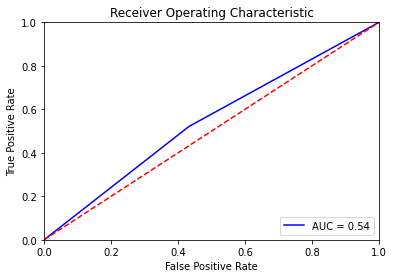

In [50]:
fpr, tpr, threshold = metrics.roc_curve(data_orig_class, data_pred_class)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()